<a href="https://colab.research.google.com/github/Sriz/streamlit-example/blob/master/Streamlit_and_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain

In [ ]:
!pip install langchain streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install duckduckgo-search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
#creating a parent container to render output
from langchain.callbacks import StreamlitCallbackHandler
from langchain.llms import OpenAI
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.callbacks import StreamlitCallbackHandler
import streamlit as st

st_callback = StreamlitCallbackHandler(st.container())

In [27]:
from langchain.llms import OpenAI

llm = OpenAI(openai_api_key= os.getenv("OPENAI_API_KEY"))

In [ ]:
from langchain.llms import OpenAI
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.callbacks import StreamlitCallbackHandler
import streamlit as st

#llm = OpenAI(temperature=0, streaming=True)
tools = load_tools(["ddg-search"])
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

if prompt := st.chat_input():
    st.chat_message("user").write(prompt)
    with st.chat_message("assistant"):
        st_callback = StreamlitCallbackHandler(st.container())
        response = agent.run(prompt, callbacks=[st_callback])
        st.write(response)

In [21]:
#install streamlit for UI
!pip install -q streamlit

In [22]:
#streamlit sample app
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Writing app.py


In [23]:
#local tunnel
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.631s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [24]:
#run in the backgroud
!streamlit run app.py &>/content/logs.txt &

In [26]:
#publish in server
#!npx localtunnel --port 8501

In [32]:
st.title('Code Generator UI')


with st.form('my_form'):
    language = st.selectbox("Select a language",('Python','Java','C++'))
    prompt_text = st.text_input("Enter your prompt here", '', 5000, 2000)
    submitted = st.form_submit_button('Submit')
    st.info(llm(language, prompt_text))

##Environment setup

In [ ]:
%%capture
# update or install the necessary libraries
!pip install --upgrade openai
!pip install --upgrade python-dotenv

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv('key.env')

True

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(openai_api_key= os.getenv("OPENAI_API_KEY"))

In [ ]:
# !export OPENAI_API_KEY='sk-#'

In [ ]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

llm = OpenAI()
chat_model = ChatOpenAI()

text = "What would be a good company name for a company that makes colorful socks?"

print(llm.predict(text))
print()

print(chat_model.predict(text))



RainbowSox

VividSock Co.


In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}?")
prompt.format(product="colorful umbrella")

'What is a good name for a company that makes colorful umbrella?'

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate

template = "You are a helpful assistant that translates {input_language} to {output_language}."
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])

chat_prompt.format_messages(input_language="English", output_language="French", text="I love programming.")

[SystemMessage(content='You are a helpful assistant that translates English to French.'),
 HumanMessage(content='I love programming.')]

In [ ]:
chat_model(chat_prompt.format_messages(input_language="English", output_language="French", text="I love programming."))

AIMessage(content="J'adore la programmation.")

##Output parsers
OutputParsers convert the raw output of an LLM into a format that can be used downstream. There are few main type of OutputParsers, including:


* Convert text from LLM -> structured information (e.g. JSON)
* Convert a ChatMessage into just a string
* Convert the extra information returned from a call besides the message (like OpenAI function invocation) into a string.

In [ ]:
from langchain.schema import BaseOutputParser

class CommaSeparatedListOutputParser(BaseOutputParser):
    """Parse the output of an LLM call to a comma-separated list."""


    def parse(self, text: str):
        """Parse the output of an LLM call."""
        return text.strip().split(", ")

CommaSeparatedListOutputParser().parse("hi, bye")

['hi', 'bye']

##PromptTemplate + LLM + OutputParser

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langchain.schema import BaseOutputParser

class CommaSeparatedListOutputParser(BaseOutputParser):
    """Parse the output of an LLM call to a comma-separated list."""


    def parse(self, text: str):
        """Parse the output of an LLM call."""
        return text.strip().split(", ")

template = """You are a helpful assistant who generates comma separated lists.
A user will pass in a category, and you should generate 5 objects in that category in a comma separated list.
ONLY return a comma separated list, and nothing more."""
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])
chain = chat_prompt | ChatOpenAI() | CommaSeparatedListOutputParser()
chain.invoke({"text": "computer"})


['laptop', 'desktop', 'monitor', 'keyboard', 'mouse']

##Model I/O
The core element of any language model application is...the model. LangChain gives you the building blocks to interface with any language model.

* **Prompts**: Templatize, dynamically select, and manage model inputs
* **Language models:** Make calls to language models through common interfaces
* **Output parsers:** Extract information from model outputs

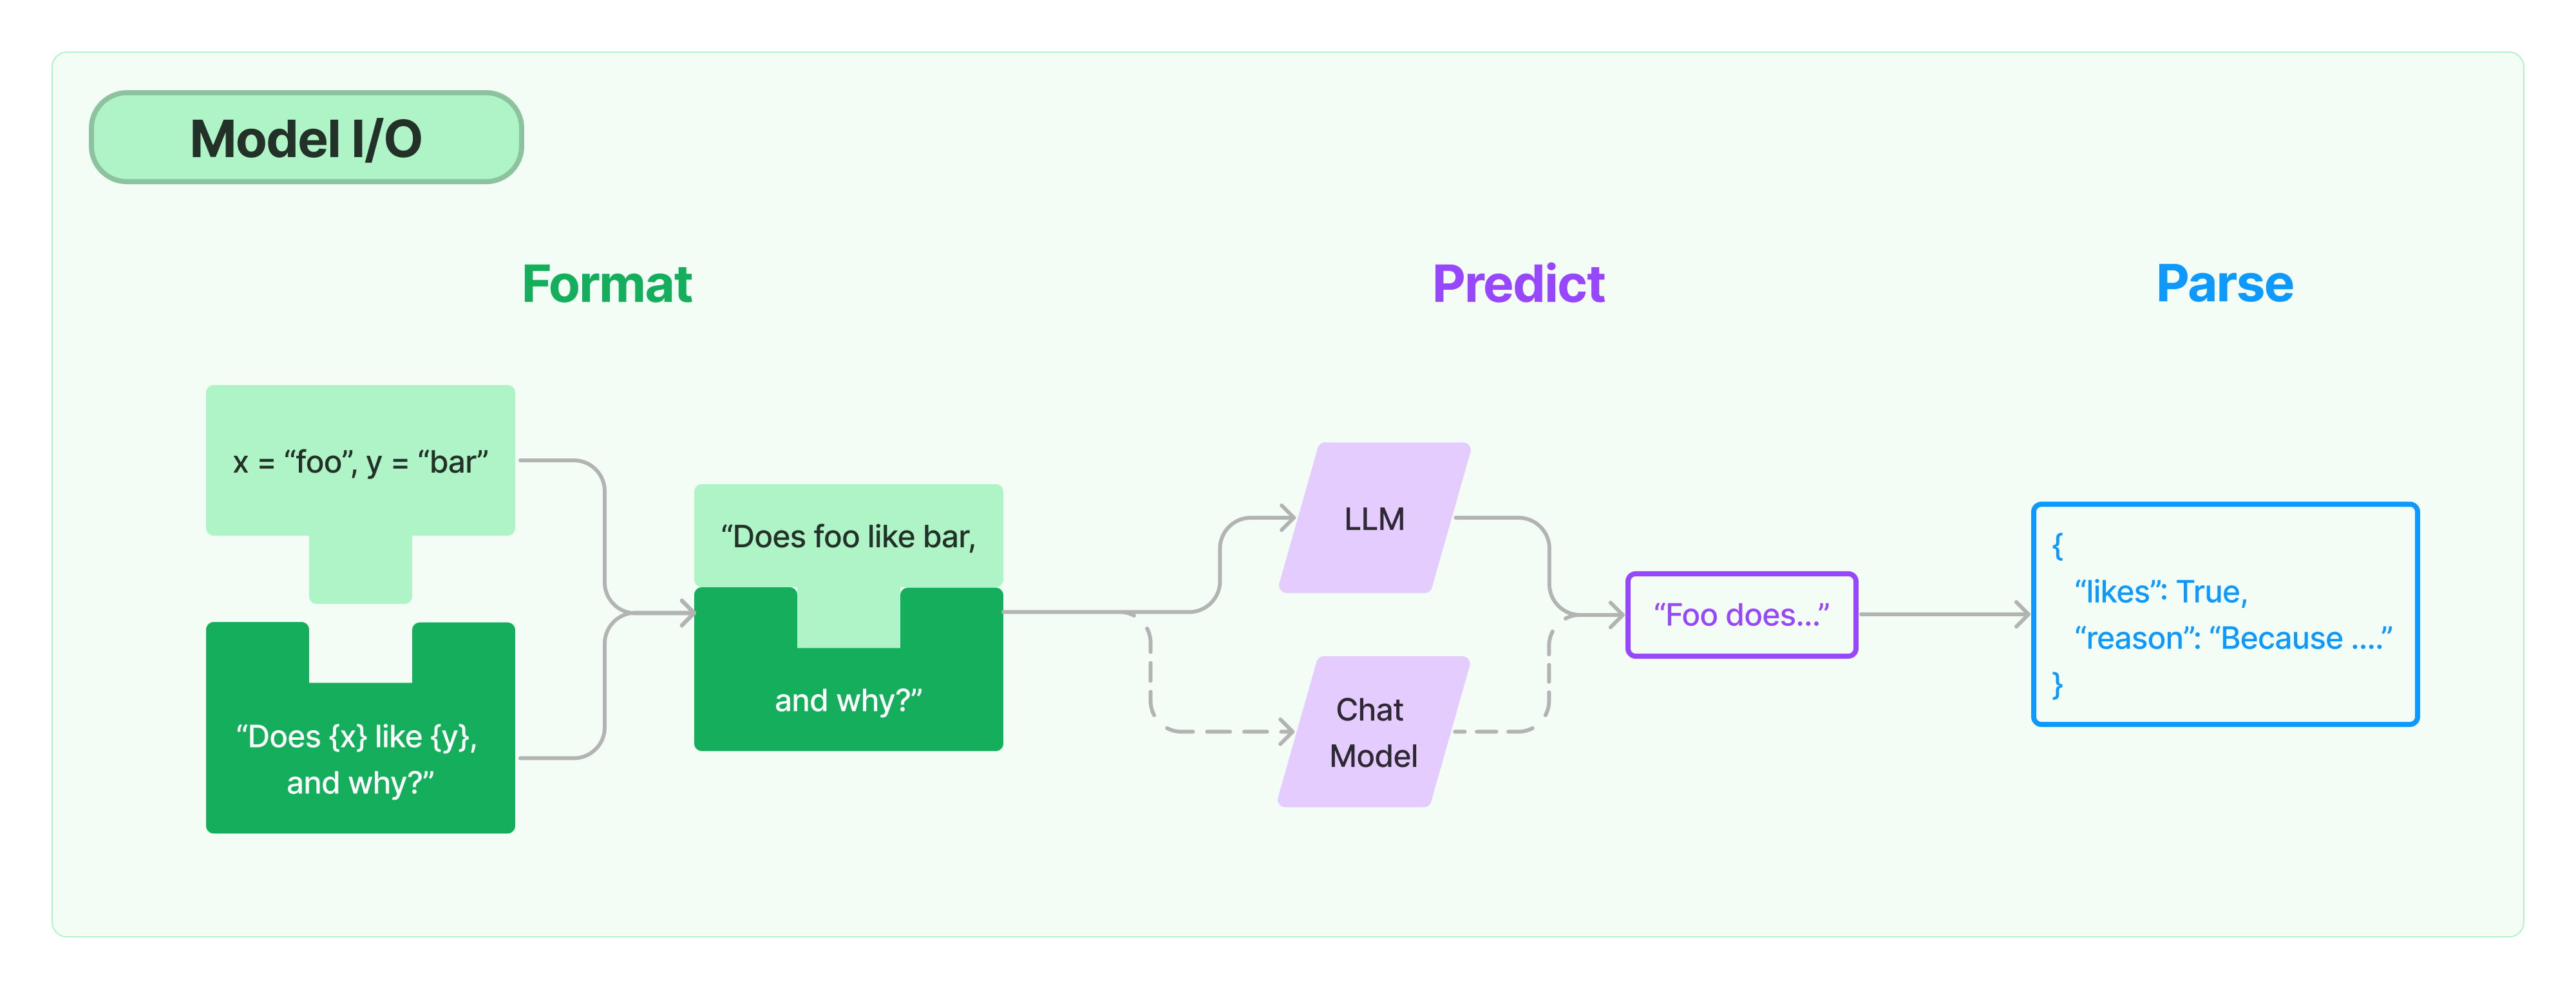


## Few-shot prompt templates


In [ ]:
#Create the example set

from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

examples = [
  {
    "question": "Who lived longer, Muhammad Ali or Alan Turing?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali
"""
  },
  {
    "question": "When was the founder of craigslist born?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952
"""
  },
  {
    "question": "Who was the maternal grandfather of George Washington?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary Ball Washington?
Intermediate answer: The father of Mary Ball Washington was Joseph Ball.
So the final answer is: Joseph Ball
"""
  },
  {
    "question": "Are both the directors of Jaws and Casino Royale from the same country?",
    "answer":
"""
Are follow up questions needed here: Yes.
Follow up: Who is the director of Jaws?
Intermediate Answer: The director of Jaws is Steven Spielberg.
Follow up: Where is Steven Spielberg from?
Intermediate Answer: The United States.
Follow up: Who is the director of Casino Royale?
Intermediate Answer: The director of Casino Royale is Martin Campbell.
Follow up: Where is Martin Campbell from?
Intermediate Answer: New Zealand.
So the final answer is: No
"""
  }
]

In [ ]:
examples[0]

{'question': 'Who lived longer, Muhammad Ali or Alan Turing?',
 'answer': '\nAre follow up questions needed here: Yes.\nFollow up: How old was Muhammad Ali when he died?\nIntermediate answer: Muhammad Ali was 74 years old when he died.\nFollow up: How old was Alan Turing when he died?\nIntermediate answer: Alan Turing was 41 years old when he died.\nSo the final answer is: Muhammad Ali\n'}

In [ ]:
#Create a formatter for the few-shot examples
example_prompt = PromptTemplate(input_variables=["question", "answer"], template="Question:- {question}\n\n{answer}")

print(example_prompt.format(**examples[0]))

Question:- Who lived longer, Muhammad Ali or Alan Turing?


Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali



In [ ]:
#Feed examples and formatter to FewShotPromptTemplate
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"]
)

print(prompt.format(input="Who was the father of Mary Ball Washington?"))

Question:- Who lived longer, Muhammad Ali or Alan Turing?


Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali


Question:- When was the founder of craigslist born?


Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952


Question:- Who was the maternal grandfather of George Washington?


Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary 

In [ ]:
print(llm(prompt.format(input="Who was the father of Mary Ball Washington?")))

 

Are follow up questions needed here: No.
So the final answer is: Augustine Washington


## Example selectors


### Select by length

This example selector selects which examples to use based on length. This is useful when you are worried about constructing a prompt that will go over the length of the context window. For longer inputs, it will select fewer examples to include, while for shorter inputs it will select more.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.prompts import FewShotPromptTemplate
from langchain.prompts.example_selector import LengthBasedExampleSelector


# Examples of a pretend task of creating antonyms.
examples = [
    {"input": "happy", "output": "sad"},
    {"input": "tall", "output": "short"},
    {"input": "energetic", "output": "lethargic"},
    {"input": "sunny", "output": "gloomy"},
    {"input": "windy", "output": "calm"},
]

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Input: {input}\nOutput: {output}",
)
example_selector = LengthBasedExampleSelector(
    # The examples it has available to choose from.
    examples=examples,
    # The PromptTemplate being used to format the examples.
    example_prompt=example_prompt,
    # The maximum length that the formatted examples should be.
    # Length is measured by the get_text_length function below.
    max_length= 25,
    # The function used to get the length of a string, which is used
    # to determine which examples to include. It is commented out because
    # it is provided as a default value if none is specified.
    # get_text_length: Callable[[str], int] = lambda x: len(re.split("\n| ", x))
)
dynamic_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="Give the antonym of every input",
    suffix="Input: {adjective}\nOutput:",
    input_variables=["adjective"],
)

In [ ]:
print(dynamic_prompt.format(adjective="big"))

Give the antonym of every input

Input: happy
Output: sad

Input: tall
Output: short

Input: energetic
Output: lethargic

Input: sunny
Output: gloomy

Input: windy
Output: calm

Input: big
Output:


In [ ]:
# An example with long input, so it selects only one example.
long_string = "big and huge and massive and large and gigantic and tall and much much much much much bigger than everything else"
print(dynamic_prompt.format(adjective=long_string))

Give the antonym of every input

Input: happy
Output: sad

Input: big and huge and massive and large and gigantic and tall and much much much much much bigger than everything else
Output:


In [ ]:
llm(dynamic_prompt.format(adjective=long_string))

' tiny and small and minuscule and diminutive and dwarfed and short and much much much much much smaller than everything else.'

###Select by maximal marginal relevance (MMR)

The `MaxMarginalRelevanceExampleSelector` selects examples based on a combination of which examples are most similar to the inputs, while also optimizing for diversity. It does this by finding the examples with the embeddings that have the greatest cosine similarity with the inputs, and then iteratively adding them while penalizing them for closeness to already selected examples.

In [ ]:
from langchain.prompts.example_selector import (
    MaxMarginalRelevanceExampleSelector,
    SemanticSimilarityExampleSelector,
)
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Input: {input}\nOutput: {output}",
)

# Examples of a pretend task of creating antonyms.
examples = [
    {"input": "happy", "output": "sad"},
    {"input": "tall", "output": "short"},
    {"input": "energetic", "output": "lethargic"},
    {"input": "sunny", "output": "gloomy"},
    {"input": "windy", "output": "calm"},
]

In [ ]:
%%capture
!pip install tiktoken
!pip install faiss-cpu

In [ ]:
example_selector = MaxMarginalRelevanceExampleSelector.from_examples(
    # The list of examples available to select from.
    examples,
    # The embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(),
    # The VectorStore class that is used to store the embeddings and do a similarity search over.
    FAISS,
    # The number of examples to produce.
    k=2,
)
mmr_prompt = FewShotPromptTemplate(
    # We provide an ExampleSelector instead of examples.
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix="Give the antonym of every input",
    suffix="Input: {adjective}\nOutput:",
    input_variables=["adjective"],
)

In [ ]:
print(mmr_prompt.format(adjective="worried"))

Give the antonym of every input

Input: happy
Output: sad

Input: windy
Output: calm

Input: worried
Output:


##In Memory Cache

In [ ]:
%%time

import langchain
from langchain.cache import InMemoryCache

langchain.llm_cache = InMemoryCache()

# The first time, it is not yet in cache, so it should take longer
print(llm.predict("Tell me a joke"))



Q: What did the fish say when it hit the wall?
A: Dam!
CPU times: user 542 ms, sys: 11.9 ms, total: 554 ms
Wall time: 1.24 s


In [ ]:
%%time

print(llm.predict("Tell me a joke"))



Q: What did the fish say when it hit the wall?
A: Dam!
CPU times: user 2.47 ms, sys: 0 ns, total: 2.47 ms
Wall time: 2.33 ms


##Streaming

In [ ]:
from langchain.llms import OpenAI
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

llm = OpenAI(streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature=0)
resp = llm("Write me a song about  water.")



Verse 1
Water, so pure and so clear
It's the lifeblood of the Earth, so precious and dear
It's the source of all life, so vital and strong
It's the essence of life, so we must be wise

Chorus
Water, so precious and so divine
It's the lifeblood of the Earth, so we must be kind
It's the source of all life, so we must protect
It's the essence of life, so we must respect

Verse 2
From the oceans to the rivers, to the lakes and streams
It's the lifeblood of the Earth, so we must keep it clean
From the raindrops to the snowflakes, to the mist and dew
It's the lifeblood of the Earth, so we must be true

Chorus
Water, so precious and so divine
It's the lifeblood of the Earth, so we must be kind
It's the source of all life, so we must protect
It's the essence of life, so we must respect

Bridge
We must be mindful of our actions, and the choices we make
For the future of our planet, we must take the pledge
To protect

##Tracking token usage

In [ ]:
from langchain.callbacks import get_openai_callback

with get_openai_callback() as cb:
    llm = OpenAI()
    result = llm("Who was the father of Mary Ball Washington?")
    print(f"Total Tokens: {cb.total_tokens}")
    print(f"Prompt Tokens: {cb.prompt_tokens}")
    print(f"Completion Tokens: {cb.completion_tokens}")
    print(f"Total Cost (USD): ${cb.total_cost}")

Total Tokens: 20
Prompt Tokens: 9
Completion Tokens: 11
Total Cost (USD): $0.00039999999999999996


## Output parsers

### List parser


In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI
from langchain.output_parsers import DatetimeOutputParser
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

output_parser = CommaSeparatedListOutputParser()

format_instructions = output_parser.get_format_instructions()
prompt = PromptTemplate(
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],
    partial_variables={"format_instructions": format_instructions}
)

model = OpenAI(temperature=0)

_input = prompt.format(subject="ice cream flavors")
output = model(_input)

output_parser.parse(output)

['Vanilla',
 'Chocolate',
 'Strawberry',
 'Mint Chocolate Chip',
 'Cookies and Cream']

In [ ]:
print(_input)

List five ice cream flavors.
Your response should be a list of comma separated values, eg: `foo, bar, baz`


### Datetime parser


In [ ]:
output_parser = DatetimeOutputParser()
template = """Answer the users question:

{question}

{format_instructions}"""
prompt = PromptTemplate.from_template(
    template,
    partial_variables={"format_instructions": output_parser.get_format_instructions()},
)

chain = LLMChain(prompt=prompt, llm=OpenAI())

print(chain.run("around when was bitcoin founded?"))



2008-01-03T00:00:00.000000Z


In [ ]:
output_parser.get_format_instructions()

'Write a datetime string that matches the \n            following pattern: "%Y-%m-%dT%H:%M:%S.%fZ". Examples: 473-07-02T10:00:03.459686Z, 221-10-06T16:15:56.098162Z, 451-03-12T16:19:29.713530Z'

###Pydantic (JSON) parser



In [ ]:
from typing import List

from langchain.llms import OpenAI
from langchain.output_parsers import PydanticOutputParser
from langchain.prompts import PromptTemplate
from langchain.pydantic_v1 import BaseModel, Field, validator

model = OpenAI()

In [ ]:
# Define your desired data structure.
class Joke(BaseModel):
    setup: str = Field(description="question to set up a joke")
    punchline: str = Field(description="answer to resolve the joke")

    # You can add custom validation logic easily with Pydantic.
    @validator("setup")
    def question_ends_with_question_mark(cls, field):
        if field[-1] != "?":
            raise ValueError("Badly formed question!")
        return field


# And a query intented to prompt a language model to populate the data structure.
joke_query = "Tell me a joke."

# Set up a parser + inject instructions into the prompt template.
parser = PydanticOutputParser(pydantic_object=Joke)

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

_input = prompt.format_prompt(query=joke_query)

output = model(_input.to_string())

parser.parse(output)

Joke(setup='Why did the chicken cross the road?', punchline='To get to the other side!')

In [ ]:
type(parser.parse(output))

__main__.Joke

In [ ]:
# Here's another example, but with a compound typed field.
class Actor(BaseModel):
    name: str = Field(description="name of an actor")
    film_names: List[str] = Field(description="list of names of films they starred in")


actor_query = "Generate the filmography for a random actor."

parser = PydanticOutputParser(pydantic_object=Actor)

prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

_input = prompt.format_prompt(query=actor_query)

output = model(_input.to_string())

parser.parse(output)

Actor(name='Tom Hanks', film_names=['Forrest Gump', 'Saving Private Ryan', 'The Green Mile', 'Toy Story', 'A League of Their Own'])

##Chains

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components.

LangChain provides the **Chain** interface for such "chained" applications. We define a Chain very generically as a sequence of calls to components, which can include other chains. The base interface is simple:



In [ ]:
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

llm = OpenAI(temperature=0.9)
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

In [ ]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain only specifying the input variable.
print(chain.run("colorful socks"))




Rainbow Socks Co.


### Sequential
The next step after calling a language model is to make a series of calls to a language model. This is particularly useful when you want to take the output from one call and use it as the input to another.

In this notebook we will walk through some examples of how to do this, using sequential chains. Sequential chains allow you to connect multiple chains and compose them into pipelines that execute some specific scenario. There are two types of sequential chains:

* `SimpleSequentialChain:` The simplest fo
rm of sequential chains, where each step has a singular input/output, and the output of one step is the input to the next.
* `SequentialChain:` A more general form of sequential chains, allowing for multiple inputs/outputs.

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

In [ ]:
# This is an LLMChain to write a synopsis given a title of a play.
llm = OpenAI(temperature=.7)
synopsis_template = """You are a playwright. Given the title of play, it is your job to write a synopsis for that title.

Title: {title}
Playwright: This is a synopsis for the above play:"""
synopsis_prompt_template = PromptTemplate(input_variables=["title"], template=synopsis_template)
synopsis_chain = LLMChain(llm=llm, prompt=synopsis_prompt_template)

In [ ]:
synopsis_chain.run("Tragedy at sunset on the beach")

'\n\nTragedy at Sunset on the Beach tells the story of two childhood friends, Amy and Henry, who reunite after years apart. They form a deep bond over the course of an evening spent on a beach, but tragedy strikes when Henry is killed in a terrible accident. Amy is left to grapple with her grief, as well as the guilt of having been the one who suggested they spend the evening together. In the end, she learns to cope with her losses and move on with her life.'

In [ ]:
# This is an LLMChain to write a review of a play given a synopsis.
llm = OpenAI(temperature=.7)
template = """You are a play critic from the New York Times. Given the synopsis of play, it is your job to write a review for that play.

Play Synopsis:
{synopsis}
Review from a New York Times play critic of the above play:"""
prompt_template = PromptTemplate(input_variables=["synopsis"], template=template)
review_chain = LLMChain(llm=llm, prompt=prompt_template)

In [ ]:
# This is the overall chain where we run these two chains in sequence.
from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[synopsis_chain, review_chain], verbose=True)

In [ ]:
review = overall_chain.run("Tragedy at sunset on the beach")



> Entering new SimpleSequentialChain chain...


Tragedy at Sunset on the Beach tells the story of two childhood friends, Amy and Henry, who reunite after years apart. They form a deep bond over the course of an evening spent on a beach, but tragedy strikes when Henry is killed in a terrible accident. Amy is left to grapple with her grief, as well as the guilt of having been the one who suggested they spend the evening together. In the end, she learns to cope with her losses and move on with her life.


"Tragedy at Sunset on the Beach, written and directed by John Doe, is a heartbreaking story of friendship and loss. The play follows the two childhood friends, Amy and Henry, as they reconnect and share an evening on the beach that tragically ends in Henry's untimely death. Doe expertly captures the emotional complexity of Amy's grief, as she struggles to cope with her guilt and her feelings of loss. The performances by the lead actors are riveting and powerful, and the script is fille

##Memory

Most LLM applications have a conversational interface. An essential component of a conversation is being able to refer to information introduced earlier in the conversation. At bare minimum, a conversational system should be able to access some window of past messages directly. A more complex system will need to have a world model that it is constantly updating, which allows it to do things like maintain information about entities and their relationships.

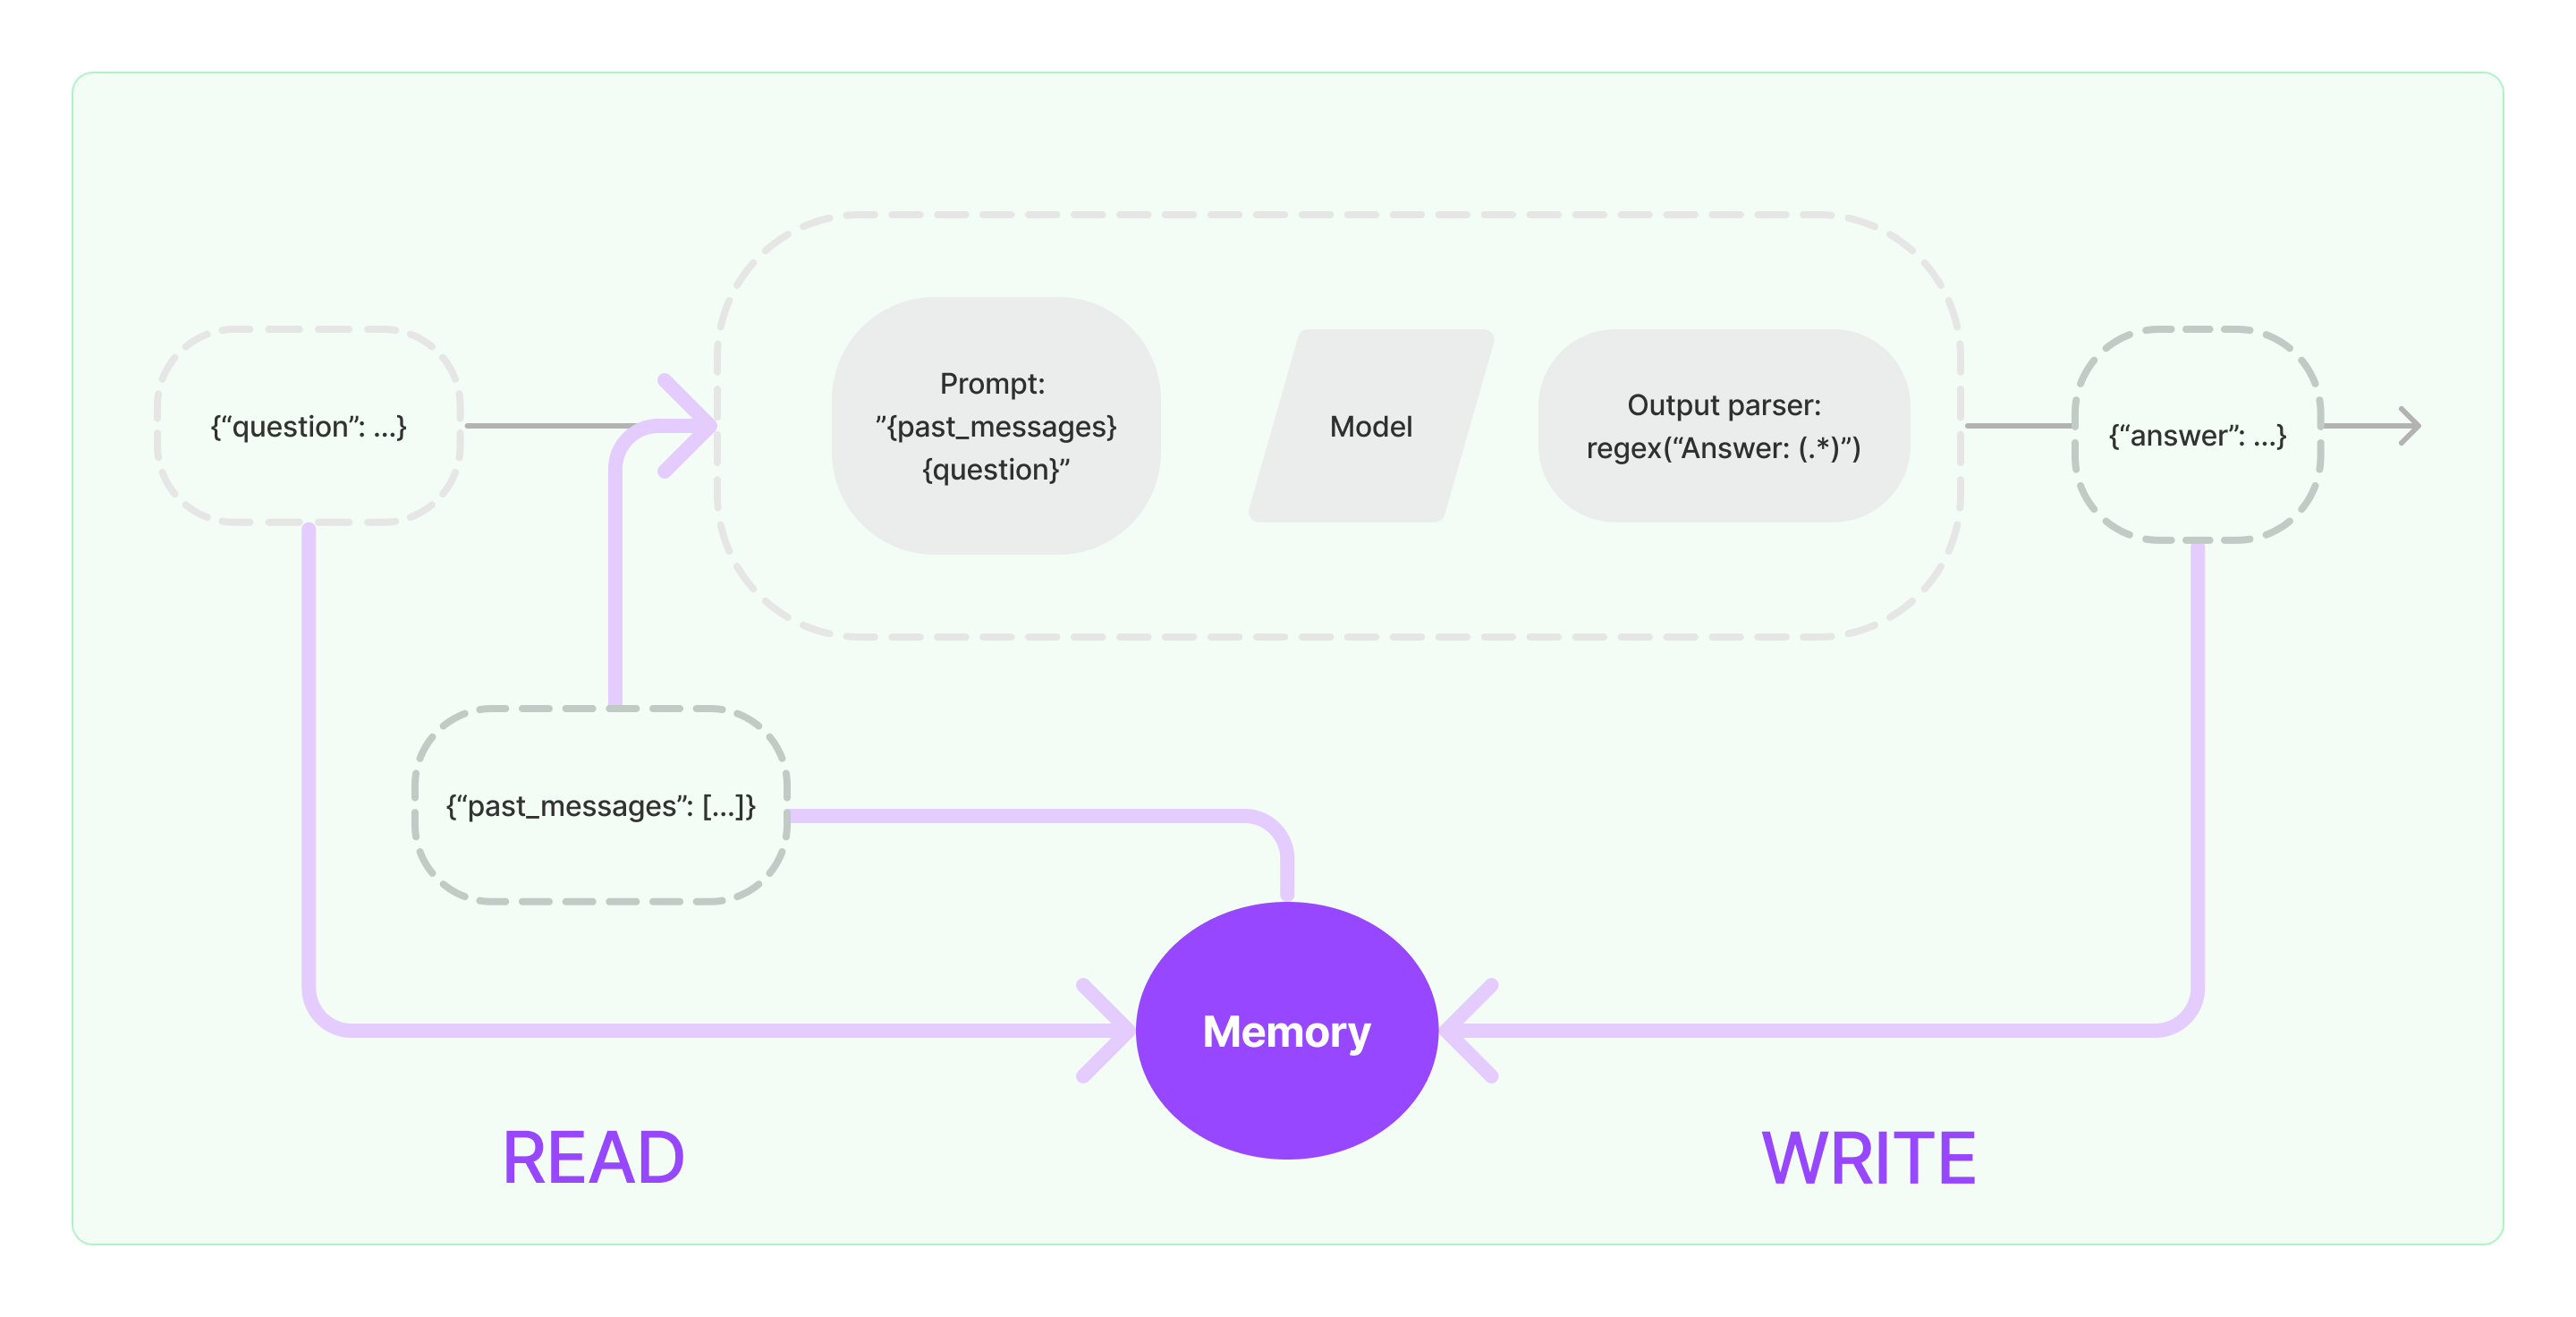

In [ ]:
from langchain.memory import ChatMessageHistory

history = ChatMessageHistory()

history.add_user_message("hi!")

history.add_ai_message("whats up?")

history

ChatMessageHistory(messages=[HumanMessage(content='hi!'), AIMessage(content='whats up?')])

##Conversation Buffer
This notebook shows how to use `ConversationBufferMemory`. This memory allows for storing messages and then extracts the messages in a variable.

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.save_context({"input": "hi"}, {"output": "whats up"})

memory.load_memory_variables({})

{'history': 'Human: hi\nAI: whats up'}

##Using in a chain

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import ConversationChain


llm = OpenAI(temperature=0)
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

conversation.predict(input="Hi there!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there!
AI:

> Finished chain.


" Hi there! It's nice to meet you. How can I help you today?"

In [ ]:
conversation.predict(input="What's all your capabilities?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI:  Hi there! It's nice to meet you. How can I help you today?
Human: What's all your capabilities?
AI:

> Finished chain.


" I'm an AI assistant that can help you with a variety of tasks. I can help you with scheduling, reminders, research, and more. I'm also able to provide you with personalized recommendations based on your preferences. Do you have any specific questions about what I can do?"

##Conversation Buffer Window
`ConversationBufferWindowMemory` keeps a list of the interactions of the conversation over time. It only uses the last K interactions. This can be useful for keeping a sliding window of the most recent interactions, so the buffer does not get too large.

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory( k=1)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})

memory.load_memory_variables({})

{'history': 'Human: not much you\nAI: not much'}

##Using in a chain

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
conversation_with_summary = ConversationChain(
    llm=OpenAI(temperature=0),
    memory=ConversationBufferWindowMemory(k=2),
    verbose=True
)
conversation_with_summary.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


" Hi there! I'm doing great. I'm currently helping a customer with a technical issue. How about you?"

In [ ]:
conversation_with_summary.predict(input="What's their issues?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, what's up?
AI:  Hi there! I'm doing great. I'm currently helping a customer with a technical issue. How about you?
Human: What's their issues?
AI:

> Finished chain.


" The customer is having trouble connecting to their Wi-Fi network. I'm helping them troubleshoot the issue and get them connected."

In [ ]:
conversation_with_summary.predict(input="Is it going well?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What's their issues?
AI:  The customer is having trouble connecting to their Wi-Fi network. I'm helping them troubleshoot the issue and get them connected.
Human: Is it going well?
AI:  Yes, it's going well so far. We've already identified the problem and are now working on a solution.
Human: Is it going well?
AI:

> Finished chain.


" Yes, it's going well. We've already identified the issue and are now working on a solution. We should have them connected soon."

##Other Memory Options:-
1. Entity
2. Conversation Knowledge Graph
3. Conversation Summary
4. Conversation Summary Buffer
5. Conversation Token Buffer
6. Backed by a Vector Store

In [ ]:
from langchain.memory import ConversationSummaryMemory, ChatMessageHistory
from langchain.llms import OpenAI

memory = ConversationSummaryMemory(llm=OpenAI(temperature=0))
memory.save_context({"input": "hi"}, {"output": "whats up"})

messages = memory.chat_memory.messages
previous_summary = ""
memory.predict_new_summary(messages, previous_summary)

history = ChatMessageHistory()
history.add_user_message("hi")
history.add_ai_message("hi there!")

memory = ConversationSummaryMemory.from_messages(
    llm=OpenAI(temperature=0),
    chat_memory=history,
    return_messages=True
)

memory.buffer

'\nThe human greets the AI, to which the AI responds with a friendly greeting.'

In [ ]:
memory = ConversationSummaryMemory(
    llm=OpenAI(temperature=0),
    buffer="The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.",
    chat_memory=history,
    return_messages=True
)

memory.buffer

'The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.'

## Agents
The core idea of agents is to use an LLM to choose a sequence of actions to take. In chains, a sequence of actions is hardcoded (in code). In agents, a language model is used as a reasoning engine to determine which actions to take and in which order.

Some important terminology (and schema) to know:

1. `AgentAction`: This is a dataclass that represents the action an agent should take. It has a tool property (which is the name of the tool that should be invoked) and a tool_input property (the input to that tool)
2. `AgentFinish`: This is a dataclass that signifies that the agent has finished and should return to the user. It has a return_values parameter, which is a dictionary to return. It often only has one key - output - that is a string, and so often it is just this key that is returned.
3. `intermediate_steps`: These represent previous agent actions and corresponding outputs that are passed around. These are important to pass to future iteration so the agent knows what work it has already done. This is typed as a List[Tuple[AgentAction, Any]]. Note that observation is currently left as type Any to be maximally flexible. In practice, this is often a string.


In [ ]:
from langchain.agents import initialize_agent, AgentType, Tool
from langchain.chains import LLMMathChain
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")
llm_math_chain = LLMMathChain.from_llm(llm=llm, verbose=True)

In [ ]:
tools = [
    Tool(
        name="Calculator",
        func=llm_math_chain.run,
        description="useful for when you need to answer questions about math"
    )
]

In [ ]:
agent_executor = initialize_agent(tools, llm, agent=AgentType.OPENAI_FUNCTIONS, verbose=True)

In [ ]:
agent_executor.invoke({"input": "43 raised to the 0.43 power?"})



> Entering new AgentExecutor chain...

Invoking: `Calculator` with `43^0.43`




> Entering new LLMMathChain chain...
43^0.43```text
43**0.43
```
...numexpr.evaluate("43**0.43")...

Answer: 5.0395462574574275
> Finished chain.
Answer: 5.039546257457427543 raised to the power of 0.43 is approximately 5.0395.

> Finished chain.


{'input': '43 raised to the 0.43 power?',
 'output': '43 raised to the power of 0.43 is approximately 5.0395.'}

##CallBacks

LangChain provides a callbacks system that allows you to hook into the various stages of your LLM application. This is useful for logging, monitoring, streaming, and other tasks.

You can subscribe to these events by using the `callbacks` argument available throughout the API. This argument is list of handler objects, which are expected to implement one or more of the methods described below in more detail.

In [ ]:
from langchain.callbacks import StdOutCallbackHandler
from langchain.chains import LLMChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

handler = StdOutCallbackHandler()
llm = OpenAI()
prompt = PromptTemplate.from_template("1 + {number} = ")

# Constructor callback: First, let's explicitly set the StdOutCallbackHandler when initializing our chain
chain = LLMChain(llm=llm, prompt=prompt, callbacks=[handler])
chain.run(number=2)

# Use verbose flag: Then, let's use the `verbose` flag to achieve the same result
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
chain.run(number=2)

# Request callbacks: Finally, let's use the request `callbacks` to achieve the same result
chain = LLMChain(llm=llm, prompt=prompt)
chain.run(number=2, callbacks=[handler])



> Entering new LLMChain chain...
Prompt after formatting:
1 + 2 = 

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
1 + 2 = 

> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:
1 + 2 = 

> Finished chain.


'\n\n3'

##Custom callback handlers


In [ ]:
from langchain.callbacks.base import BaseCallbackHandler
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage


class MyCustomHandler(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs) -> None:
        print(f"My custom handler, token: {token}")


# To enable streaming, we pass in `streaming=True` to the ChatModel constructor
# Additionally, we pass in a list with our custom handler
chat = ChatOpenAI(max_tokens=25, streaming=True, callbacks=[MyCustomHandler()])

chat([HumanMessage(content="Tell me a joke")])

My custom handler, token: 
My custom handler, token: Sure
My custom handler, token: ,
My custom handler, token:  here
My custom handler, token: 's
My custom handler, token:  a
My custom handler, token:  classic
My custom handler, token:  one
My custom handler, token:  for
My custom handler, token:  you
My custom handler, token: :


My custom handler, token: Why
My custom handler, token:  don
My custom handler, token: 't
My custom handler, token:  scientists
My custom handler, token:  trust
My custom handler, token:  atoms
My custom handler, token: ?


My custom handler, token: Because
My custom handler, token:  they
My custom handler, token:  make
My custom handler, token:  up
My custom handler, token:  everything
My custom handler, token: !
My custom handler, token: 


AIMessageChunk(content="Sure, here's a classic one for you:\n\nWhy don't scientists trust atoms?\n\nBecause they make up everything!")

##Logging to file

This example shows how to print logs to file. It shows how to use the `FileCallbackHandler`, which does the same thing as `StdOutCallbackHandler`, but instead writes the output to file. It also uses the loguru library to log other outputs that are not captured by the handler.

In [ ]:
!pip install loguru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
from loguru import logger

from langchain.callbacks import FileCallbackHandler
from langchain.chains import LLMChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

logfile = "output.log"

logger.add(logfile, colorize=True, enqueue=True)
handler = FileCallbackHandler(logfile)

llm = OpenAI()
prompt = PromptTemplate.from_template("1 + {number} = ")

# this chain will both print to stdout (because verbose=True) and write to 'output.log'
# if verbose=False, the FileCallbackHandler will still write to 'output.log'
chain = LLMChain(llm=llm, prompt=prompt, callbacks=[handler], verbose=True)
answer = chain.run(number=2)
logger.info(answer)



> Entering new LLMChain chain...
Prompt after formatting:
1 + 2 = 


2023-10-13 15:35:20.183 | INFO     | __main__:<cell line: 20>:20 - 
3



> Finished chain.


#Assignment - due by 10/20

Create a conversational chatbot using Streamlit, Langchain and Open AI models.

Features:-
1. Tools
2. Memory



Title:
Constructing a Dialog Agent with Streamlit, Langchain, and Open AI Frameworks

Objective:
The goal of this assignment is to develop a sophisticated chatbot capable of conducting real-time dialogues, leveraging the capabilities of Streamlit, Langchain, and OpenAI technologies.

Core Functionalities:

1. Real-Time Interaction: Enable live communication by utilizing streaming, ensuring that the outputs are displayed promptly as they are generated.
2. Integration of Assisting Tools: Employ intermediary tools that can enhance the conversation, aiding in the flow and comprehension of the dialogue.
3. Conversation Tracking: Implement ConversationSummaryBuffer to maintain a coherent record of the ongoing dialogue, ensuring that the chatbot can reference previous exchanges for context.
4. Conversation Logging: Ensure the conversation, along with the outputs, are logged into a SQLite database, which will serve as a repository for analyzing and reviewing the interactions.
5. Deployment: Host the developed application either on Streamlit or Heroku, ensuring that it is accessible for users to interact with.
6. Cost & Usage: Get the no of token used and print the cost on sidebar using callbacks.

By accomplishing the aforementioned functionalities, you will not only exhibit a robust understanding of the involved technologies but also demonstrate the ability to create an interactive and user-friendly conversational agent. The successful completion of this assignment will reflect your competency in integrating various tools to construct a functional and interactive dialog system.


Clarification on 10/13: create a ChatGPT-like clone that chats with users and also shows cost in the left side, saves log in a SQLite db. You can connect with chatgpt 3.5.
